n4 1.723500748845666 -1.487099197524217
noise 8.881784197001252e-16 8.881784197001252e-16 8.881784197001252e-16
n 2.220446049250313e-16 1.1102230246251565e-16 1.1102230246251565e-16


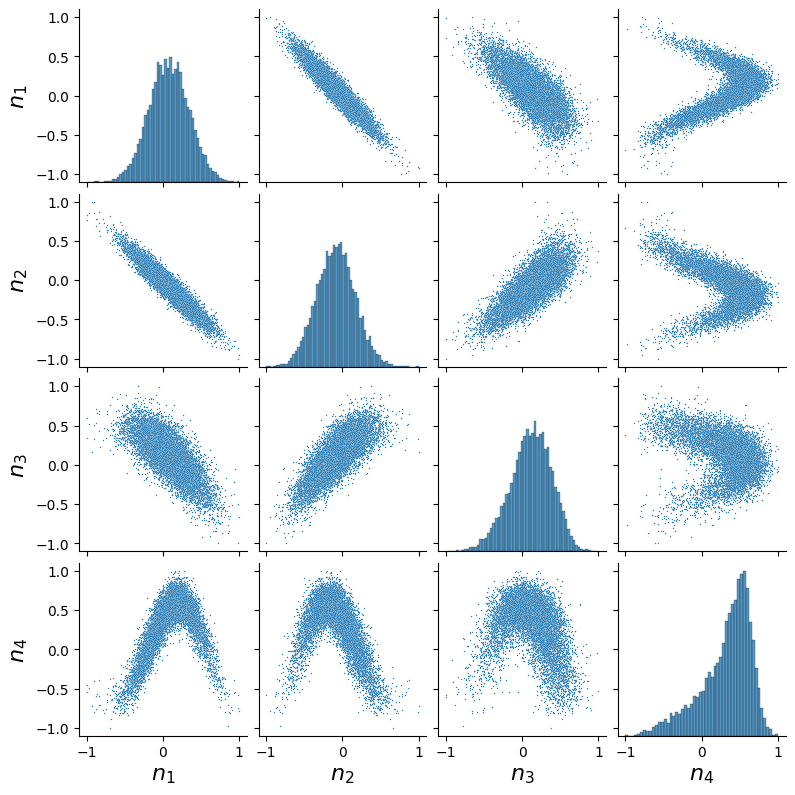

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子
seed=1
np.random.seed(seed)  # 42是一个任意的整数，你可以使用任何整数作为种子

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inv_sigmoid(y):
    return np.log(y/(1-y))

def get_noise(data):
    n4=data[:, 3]
    n3=data[:, 2]
    n2=data[:, 1]
    n1=data[:, 0]
    e2=(n2+n1)*3.0
    e3=(n3-np.sin(np.pi*0.1*(n2+2.0)))*5.0
    e4 =(n4-np.sin(np.pi*0.25*(n3-n1+2)))*5.0
    return e2, e3, e4

def get_n4(e4, n1, n2, n3):
    return np.sin(np.pi*0.25*(n3-n1+2))+e4/5.0

def get_n3(e3, n1, n2):
    return np.sin(np.pi*0.1*(n2+2.0))+e3/5.0

def get_n2(e2, n1):
    return -n1+e2/3.0  

def get_toy(n_samples=10000):
    n1=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    e2=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    n2 = -n1+e2/3.0
    e3=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    n3=np.sin(np.pi*0.1*(n2+2.0))+e3/5.0
    e4=np.random.normal(0, 1., n_samples).reshape(-1, 1)
    n4=np.sin(np.pi*0.25*(n3-n1+2))+e4/5.0
    data =np.concatenate((n1, n2, n3, n4), axis=1)
    noise = np.concatenate((e2, e3, e4), axis=1)
    # return data, noise
    return data, noise

data, noise=get_toy()
data_test, noise_test=get_toy()
print('n4', data[:, 3].max(), data[:, 3].min())
def abs_max(a, b):
    return np.abs(a-b).max()

e2_p, e3_p, e4_p =get_noise(data)
print('noise', abs_max(e2_p, noise[:,0]), abs_max(e3_p, noise[:,1]), abs_max(e4_p, noise[:,2]))
n4=data[:, 3]
n3=data[:, 2]
n2=data[:, 1]
n1=data[:, 0]
n4_p = get_n4(e4_p, n1, n2, n3)
n3_p = get_n3(e3_p, n1, n2)
n2_p = get_n2(e2_p, n1)
print('n', abs_max(n2, n2_p), abs_max(n3, n3_p), abs_max(n4, n4_p))

# name='toy_dataset/toy2_'+str(seed)+'.npy'
# name_test='toy_dataset/toy2_'+str(seed)+'test.npy'
# # print(name)
# np.save(name, data)
# np.save(name_test, data_test)

# data1=np.load(name)
# print(data1.shape, np.abs(data-data1).max())


# data, noise=get_toy()
# gt_noise=get_true_noise(data)
# print(np.abs(noise-gt_noise).max()) 

# print(data.shape)

# data_n1n3=data_test[:, 2]-data_test[:, 0]
# data_test=np.concatenate([data_test, data_n1n3.reshape(-1, 1)], axis=1)
def normalize_tensor(tensor):
    # 计算每一列的最大值和最小值
    min_vals = np.min(tensor, axis=0)
    max_vals = np.max(tensor, axis=0)

    # 计算范围
    range_vals = max_vals - min_vals

    # 进行归一化操作
    normalized_tensor = -1 + 2 * (tensor - min_vals) / range_vals

    return normalized_tensor

import pandas as pd
df = pd.DataFrame(normalize_tensor(data_test), columns=['$n_1$', '$n_2$', '$n_3$', '$n_4$']) #, 'n3-n1','n1+n2'
# normalize_tensor(data_test)
# 绘制两两变量之间的散点图，调整节点大小
plot_kws = {'s': 1}
g = sns.pairplot(df, diag_kind='hist', height=2, plot_kws=plot_kws)
# 循环遍历子图并设置坐标轴标签的字体大小
label_fontsize=16
for ax in g.axes.flat:
    ax.xaxis.label.set_fontsize(label_fontsize)
    ax.yaxis.label.set_fontsize(label_fontsize)
plt.savefig('paper_pdf/toy3_corr.png')
# 显示图形
plt.show()


